In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
drug_clinical = pd.merge(clinical_trial, mouse_drug, on="Mouse ID", how="inner")


# Display the data table for preview
drug_clinical.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [32]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_gb = drug_clinical.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].mean()
# print (drug_gb)

# tumor = drug_clinical['Tumor Volume (mm3)'].mean()

# Convert to DataFrame

drug_df = pd.DataFrame(drug_gb).reset_index()
# tumor_df = pd.DataFrame(tumor)
# # Preview DataFrame
drug_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [35]:
# drug_df.describe


<bound method NDFrame.describe of          Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
..        ...        ...                 ...
95  Zoniferol         25           55.432935
96  Zoniferol         30           57.713531
97  Zoniferol         35           60.089372
98  Zoniferol         40           62.916692
99  Zoniferol         45           65.960888

[100 rows x 3 columns]>

In [62]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# drug_df.sem(axis=1)
# Convert to DataFrame

standard_error_gb = drug_clinical.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()


standard_error_df = pd.DataFrame(standard_error_gb).reset_index()
# standard_error_df = drug_df[['Tumor Volume (mm3)']].sem
# standard_error_df = drug_df(['Tumor Volume (mm3)']).sem
standard_error_df

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [68]:
# Minor Data Munging to Re-Format the Data Frames
timepoint = drug_df.set_index(['Timepoint','Drug']).unstack('Drug')

# Preview that Reformatting worked
timepoint.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Text(0.5, 1.0, 'Tumor Response to Treatment')

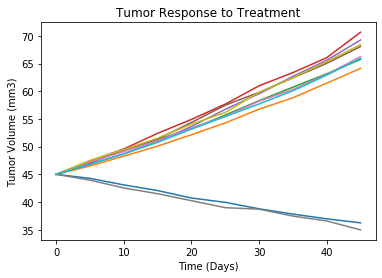

In [77]:
# Generate the Plot (with Error Bars)

plt.plot(timepoint)
# fig, ax = plt.subplots()
# means = [s.mean() for s in drug_df]

# # Calculate standard error on means
# sem = [s.sem() for s in standard_error_df]
#  # Plot sample means with error bars
# fig, ax = plt.subplots()

# ax.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b",
#             alpha=0.5, label="Graph label")

# Set the x axis from 0 to 45 in increments of 5
# x_axis = np.arange(0, 50, 5)
# means = [np.mean(s) for s in drug_df]
# standard_errors = [sem(s) for s in standard_error_df]

# ax.errorbar(x_axis, means, standard_errors, fmt="o")

# ax.set_xlim(-1, len(samples) + 1)
# ax.errorbar(np.arange(0, len(drug_df)), drug_df, yerr=sem, fmt = "o", label="Mean of House Prices")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Tumor Response to Treatment')
# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [82]:
# # Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_clinical.head()

meta_gb = drug_clinical.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()

# Convert to DataFrame

meta_df = pd.DataFrame(meta_gb).reset_index()

# Preview DataFrame
meta_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [83]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_error_gb = drug_clinical.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
std_error_df = pd.DataFrame(std_error_gb)
# Preview DataFrame
std_error_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [84]:
# Minor Data Munging to Re-Format the Data Frames
metastatic = meta_df.set_index(['Timepoint','Drug']).unstack('Drug')
# Preview that Reformatting worked
metastatic.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [87]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_gb = drug_clinical.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mouse_df = pd.DataFrame(mouse_gb).reset_index()
# Preview DataFrame
mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [88]:
mouse = mouse_df.set_index(['Timepoint','Drug']).unstack('Drug')
# Preview that Reformatting worked
mouse.head()


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)